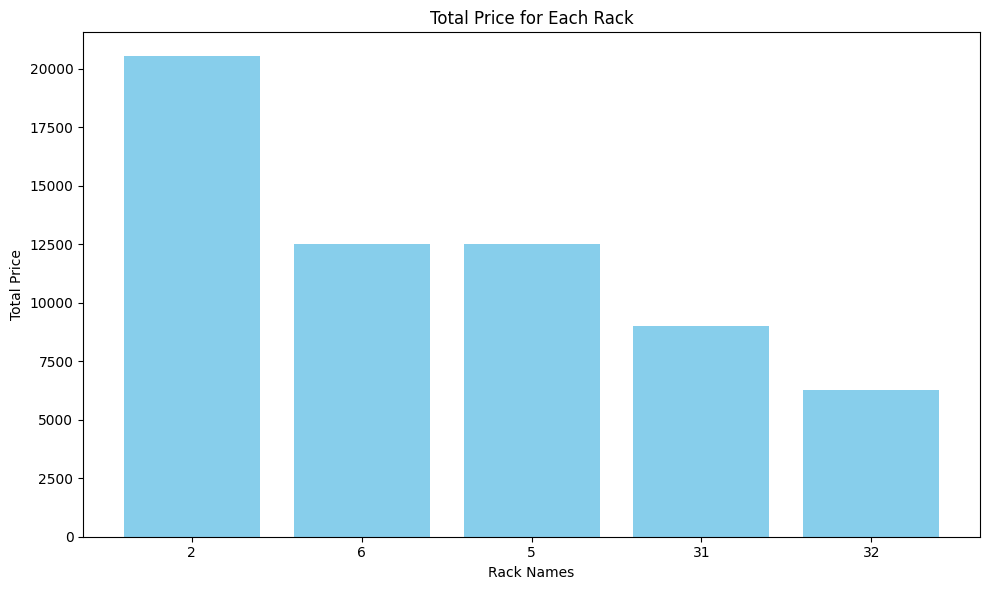

In [4]:
import requests
import matplotlib.pyplot as plt

def get_items(wid_value, uid_value):
    flask_url = f"http://127.0.0.1:5000/database-delinquents/warehouse/{wid_value}/rack/expensive"
    data = {"uid": uid_value}
    response = requests.post(flask_url, json=data)
    return response

def show_plt(wid_value, uid_value):
    items = get_items(wid_value, uid_value)
    data = items.json()['Racks']

    rack_names = [str(rack['rid']) for rack in data]
    total_prices = [rack['totalprice'] for rack in data]

    plt.figure(figsize=(10, 6))
    plt.bar(rack_names, total_prices, color='skyblue')
    plt.xlabel('Rack Names')
    plt.ylabel('Total Price')
    plt.title('Total Price for Each Rack')
    plt.tight_layout()
    
    # Get the plot as an HTML string
    plot_html_str = f'<div style="display: flex; justify-content: center;"><img src="data:image/png;base64,{plot_to_html(plt)}" /></div>'
    
    # Display the plot
    display(HTML(plot_html_str))

# Function to convert the plot to HTML
def plot_to_html(plot):
    from io import BytesIO
    import base64

    # Save the plot to a BytesIO object
    buf = BytesIO()
    plot.savefig(buf, format='png')
    buf.seek(0)
    
    # Encode the plot in base64
    plot_base64 = base64.b64encode(buf.read()).decode('utf-8')
    
    return plot_base64

